# <center>Introduction to Deep Learning in Python</center>

[Data Camp Link](https://www.datacamp.com/courses/deep-learning-in-python)

----

**Course Description**

Deep learning is the machine learning technique behind the most exciting capabilities in diverse areas like robotics, natural language processing, image recognition, and artificial intelligence, including the famous AlphaGo. In this course, you'll gain hands-on, practical knowledge of how to use deep learning with Keras 2.0, the latest version of a cutting-edge library for deep learning in Python.

[Chapter 1: Basics of deep learning and neural networks](#Chapter-1:-Basics-of-deep-learning-and-neural-networks) <br>
[Chapter 2: Optimizing a neural network with backward propagation](#Chapter-2:-Optimizing-a-neural-network-with-backward-propagation) <br>
[Chapter 3: Building deep learning models with keras](#Chapter-3:-Building-deep-learning-models-with-keras) <br>
[Chapter 4: Fine-tuning keras models](#Chapter-4:-Fine-tuning-keras-models)

----

In [1]:
# all basic package imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 1: Basics of deep learning and neural networks

In this chapter, you'll become familiar with the fundamental concepts and terminology used in deep learning, and understand why deep learning techniques are so powerful today. You'll build simple neural networks and generate predictions with them.

### Comparing neural network models to classical regression models

Which of the models in the diagrams has greater ability to account for interactions?

<img src="img/ch1ex2.png"> 

#### Possible Answers

- Model 1.
- **Model 2**.
- They are both the same.

Model 2 has more nodes in the hidden layer, and therefore, greater ability to capture interactions.

----

### Coding the forward propagation algorithm

In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:

<img src="img/ch1ex4.png"> 

Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course.

The input data has been pre-loaded as `input_data`, and the weights are available in a dictionary called `weights`. The array of weights for the first node in the hidden layer are in `weights['node_0']`, and the array of weights for the second node in the hidden layer are in `weights['node_1']`.

The weights feeding into the output node are available in `weights['output']`.

NumPy will be pre-imported for you as `np` in all exercises.

#### Instructions

- Calculate the value in node 0 by multiplying `input_data` by its weights `weights['node_0']` and computing their sum. This is the 1st node in the hidden layer.
- Calculate the value in node 1 using `input_data` and `weights['node_1']`. This is the 2nd node in the hidden layer.
- Put the hidden layer values into an array. This has been done for you.
- Generate the prediction by multiplying `hidden_layer_outputs` by `weights['output']` and computing their sum.
- Hit 'Submit Answer' to print the output!

In [2]:
# enter the data provided in the question
input_data = np.array([3,5])
weights = {'node_0': np.array([2,4]),
           'node_1': np.array([4,-5]),
           'output': np.array([2,7])}

In [3]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


It looks like the network generated a prediction of -39.

----

### The Rectified Linear Activation Function

As Dan explained to you in the video, an "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called *ReLU*) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

Here are some examples:
**relu(3) = 3**
**relu(-3) = 0**

#### Instructions

- Fill in the definition of the `relu()` function:
    - Use the `max()` function to calculate the value for the output of `relu()`. 
- Apply the `relu()` function to `node_0_input` to calculate `node_0_output`.
- Apply the `relu()` function to `node_1_input` to calculate `node_1_output`.

In [4]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


You predicted 52 transactions. Without this activation function, you would have predicted a **negative** number! The real power of activation functions will come soon when you start tuning model weights.

----

### Applying the network to many observations/rows of data

You'll now define a function called `predict_with_network()` which will generate predictions for multiple data observations, which are pre-loaded as `input_data`. As before, `weights` are also pre-loaded. In addition, the `relu()` function you defined in the previous exercise has been pre-loaded.

#### Instructions

- Define a function called `predict_with_network()` that accepts two arguments - `input_data_row` and `weights` - and returns a prediction from the network as the output.
- Calculate the input and output values for each node, storing them as: `node_0_input`, `node_0_output`, `node_1_input`, and `node_1_output`.
- `To calculate the input value of a node, multiply the relevant arrays together and compute their sum.
- `To calculate the output value of a node, apply the `relu()` function to the input value of the node.
- Calculate the model output by calculating `input_to_final_layer` and `model_output` in the same way you calculated the input and output values for the nodes.
- Use a `for` loop to iterate over `input_data`:
- `Use your `predict_with_network()` to generate predictions for each row of the `input_data` - `input_data_row`. Append each prediction to `results`.

In [5]:
# enter the data provided in the question
input_data = (np.array([3,5]), np.array([1,-1]), np.array([0,0]), np.array([8,4]))

weights = {'node_0': np.array([2,4]),
           'node_1': np.array([4,-5]),
           'output': np.array([2,7])}

In [6]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


----

### Forward propagation in a deeper network

You now have a model with 2 hidden layers. The values for an input data point are shown inside the input nodes. The weights are shown on the edges/lines. What prediction would this model make on this data point?

Assume the activation function at each node is the *identity function*. That is, each node's output will be the same as its input. So the value of the bottom node in the first hidden layer is -1, and not 0, as it would be if the ReLU activation function was used.

<img src="img/ch1ex9.png"> 

#### Possible Answers

- **0**.  <<<<<<<
- 7.
- 9.

----

### Multi-layer neural networks

In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The input data has been preloaded as `input_data`. The nodes in the first hidden layer are called `node_0_0` and `node_0_1`. Their weights are pre-loaded as `weights['node_0_0']` and `weights['node_0_1']` respectively.

The nodes in the second hidden layer are called `node_1_0` and `node_1_1`. Their weights are pre-loaded as `weights['node_1_0']` and `weights['node_1_1']` respectively.

We then create a model output from the hidden nodes using weights pre-loaded as `weights['output']`.

<img src="img/ch1ex10.png"> 

#### Instructions

- Calculate `node_0_0_input` using its weights `weights['node_0_0']` and the given `input_data`. Then apply the `relu()` function to get `node_0_0_output`.
- Do the same as above for `node_0_1_input` to get `node_0_1_output`.
- Calculate `node_1_0_input` using its weights `weights['node_1_0']` and the outputs from the first hidden layer - `hidden_0_outputs`. Then apply the `relu()` function to get `node_1_0_output`.
- Do the same as above for `node_1_1_input` to get `node_1_1_output`.
- Calculate `model_output` using its weights `weights['output']` and the outputs from the second hidden layer `hidden_1_outputs` array. Do not apply the `relu()` function to this output.

In [7]:
# enter the data provided
input_data = np.array([3,5])

weights = {'node_0_0': np.array([2, 4]),
           'node_0_1': np.array([ 4, -5]),
           'node_1_0': np.array([-1,  2]),
           'node_1_1': np.array([1, 2]),
           'output':   np.array([2, 7])}

In [8]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


The network generated a prediction of `182`.

----

### Representations are learned

How are the weights that determine the features/interactions in Neural Networks created?

#### Possible Answers

- A user chooses them when creating the model.
- **The model training process sets them to optimize predictive accuracy**.
- The weights are random numbers.

You will learn more about how Neural Networks optimize their weights in the next chapter!

----

### Levels of representation

Which layers of a model capture more complex or "higher level" interactions?

#### Possible Answers

- The first layers capture the most complex interactions.
- **The last layers capture the most complex interactions**.
- All layers capture interactions of similar complexity.

For example, in the face identification system, first layers may represent rectangles and triangles to identify the shape of the face first. The latter layers may identify the unique points of the face to create a face recognition.

----

# Chapter 2: Optimizing a neural network with backward propagation

Learn how to optimize the predictions generated by your neural networks. You'll use a method called backward propagation, which is one of the most important techniques in deep learning. Understanding how it works will give you a strong foundation to build on in the second half of the course.

### Calculating model errors

For the exercises in this chapter, you'll continue working with the network to predict transactions for a bank.

What is the error (predicted - actual) for the following network using the ReLU activation function when the input data is [3, 2] and the actual value of the target (what you are trying to predict) is 5? It may be helpful to get out a pen and piece of paper to calculate these values.

<img src="img/ch2_ex2_3.png"> 

#### Possible Answers

- 5
- 6
- **11 <<<<<**
- 16

The network generates a prediction of `16`, which results in an error of `11`.

----

### Understanding how weights change model accuracy

Imagine you have to make a prediction for a single data point. The actual value of the target is 7. The weight going from `node_0` to the output is 2, as shown below. If you increased it slightly, changing it to 2.01, would the predictions become more accurate, less accurate, or stay the same?

<img src="img/ch2_ex2_3.png"> 

#### Possible Answers

- More accurate.
- **Less accurate <<<<<**.
- Stay the same.

Increasing the weight to `2.01` would increase the resulting error from `9` to `9.08`, making the predictions *less* accurate.

----

### Coding how weight changes affect accuracy

Now you'll get to change weights in a real network and see how they affect model accuracy!

Have a look at the following neural network: 

<img src='img/ch2ex4.png'>

Its weights have been pre-loaded as `weights_0`. Your task in this exercise is to update a **single** weight in `weights_0` to create `weights_1`, which gives a perfect prediction (in which the predicted value is equal to `target_actual`: 3).

Use a pen and paper if necessary to experiment with different combinations. You'll use the `predict_with_network()` function, which takes an array of data as the first argument, and weights as the second argument.

#### Instructions

- Create a dictionary of weights called `weights_1` where you have changed **1** weight from `weights_0` (You only need to make 1 edit to `weights_0` to generate the perfect prediction).
- Obtain predictions with the new weights using the `predict_with_network()` function with `input_data` and `weights_1`.
- Calculate the error for the new weights by subtracting `target_actual` from `model_output_1`.
- Hit 'Submit Answer' to see how the errors compare!

In [9]:
# this function now accepts two inputs
def predict_with_network(input_data_point, weights):
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

In [10]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


The network now generates a perfect prediction with an error of `0`.

----

### Scaling up to multiple data points

You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as `weights_0` and `weights_1`.

`input_data` is a list of arrays. Each item in that list contains the data to make a single prediction. `target_actuals` is a list of numbers. Each item in that list is the actual value we are trying to predict.

In this exercise, you'll use the `mean_squared_error()` function from `sklearn.metrics`. It takes the true values and the predicted values as arguments.

You'll also use the preloaded `predict_with_network()` function, which takes an array of data as the first argument, and weights as the second argument.

#### Instructions

- Import `mean_squared_error` from `sklearn.metrics`.
- Using a `for` loop to iterate over each row of `input_data`:
    - Make predictions for each row with `weights_0` using the `predict_with_network()` function and append it to `model_output_0`.
    - Do the same for `weights_1`, appending the predictions to `model_output_1`.
- Calculate the mean squared error of `model_output_0` and then `model_output_1` using the `mean_squared_error()` function. The first argument should be the actual values (`target_actuals`), and the second argument should be the predicted values (`model_output_0` or `model_output_1`).

In [11]:
# enter the data provided
weights_0 = {'node_0': np.array([2, 1]), 
             'node_1': np.array([1, 2]), 
             'output': np.array([1, 1])}

weights_1 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1. , 1.5]),
             'output': np.array([1. , 1.5])}

# input data is a LIST of arrays
input_data = [np.array([0, 3]), 
              np.array([1, 2]), 
              np.array([-1, -2]), 
              np.array([4, 0])]

target_actuals = [1,3,5,7]

In [12]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


It looks like `model_output_1` has a higher mean squared error.

----

### Calculating slopes

You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is `2 * x * (xb-y)`, or `2 * input_data * error`. Note that `x` and `b` may have multiple numbers (`x` is a vector for each data point, and `b` is a vector). In this case, the output will also be a vector, which is exactly what you want.

You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called `weights` as well as data for a single point called `input_data`. The actual value of the target you want to predict is stored in `target`.

#### Instructions

- Calculate the predictions, `preds`, by multiplying `weights` by the `input_data` and computing their sum.
- Calculate the error, which is `preds` minus `target`. Notice that this error corresponds to `xb-y` in the gradient expression.
- Calculate the slope of the loss function with respect to the prediction. To do this, you need to take the product of `input_data` and `error` and multiply that by `2`.

In [13]:
# enter the data
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

# Calculate the predictions: preds
preds = (input_data * weights).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)

[14 28 42]


You can now use this slope to improve the weights of the model!

----

### Improving model weights

Hurray! You've just calculated the slopes you need. Now it's time to use those slopes to improve your model. If you add the slopes to your weights, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

The weights have been pre-loaded as `weights`, the actual value of the target as `target`, and the input data as `input_data`. The predictions from the initial weights are stored as `preds`.

#### Instructions

- Set the learning rate to be `0.01` and calculate the error from the original predictions. This has been done for you.
- Calculate the updated weights by subtracting the product of `learning_rate` and `slope` from `weights`.
- Calculate the updated predictions by multiplying `weights_updated` with `input_data` and computing their sum.
- Calculate the error for the new predictions. Store the result as `error_updated`.
- Hit 'Submit Answer' to compare the updated error to the original!

In [14]:
# enter the provided in the question
weights = np.array([0, 2, 1])
target = 0
input_data = np.array([1, 2, 3])

In [15]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - (learning_rate * slope)

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


Updating the model weights did indeed decrease the error!

----

### Making multiple updates to weights

You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.

To keep your code clean, there is a pre-loaded `get_slope()` function that takes `input_data`, `target`, and `weights` as arguments. There is also a `get_mse()` function that takes the same arguments. The `input_data`, `target`, and `weights` have been pre-loaded.

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that `weights` is a single array.

We have also pre-loaded `matplotlib.pyplot`, and the error history will be plotted after you have done your gradient descent steps.

#### Instructions

- Using a `for` loop to iteratively update weights:
    - Calculate the slope using the `get_slope()` function.
    - Update the weights using a learning rate of `0.01`.
    - Calculate the mean squared error (`mse`) with the updated weights using the `get_mse()` function.
    - Append `mse` to `mse_hist`.
- Hit 'Submit Answer' to visualize `mse_hist`. What trend do you notice?

In [16]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

In [17]:
# provide the data
input_data = np.array([1, 2, 3])
target = 0
weights = np.array([0, 2, 1])

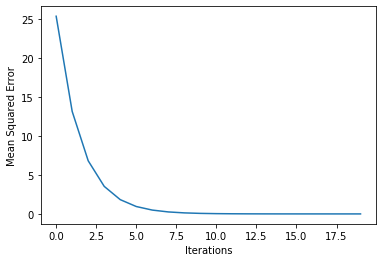

In [18]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

As you can see, the mean squared error decreases as the number of iterations go up.

----

### The relationship between forward and backward propagation

If you have gone through 4 iterations of calculating slopes (using backward propagation) and then updated weights, how many times must you have done forward propagation?

#### Possible Answers

- 0
- 1
- **4 <<<<<**
- 8

Each time you generate predictions using forward propagation, you update the weights using backward propagation.

----

### Thinking about backward propagation

If your predictions were all exactly right, and your errors were all exactly 0, the slope of the loss function with respect to your predictions would also be 0. In that circumstance, which of the following statements would be correct?

#### Possible Answers

- **The updates to all weights in the network would also be 0**.
- The updates to all weights in the network would be dependent on the activation functions.
- The updates to all weights in the network would be proportional to values from the input data.

In this situation, the updates to all weights in the network would indeed also be `0`.

----

### A round of backpropagation

In the network shown below, we have done forward propagation, and node values calculated as part of forward propagation are shown in white. The weights are shown in black. Layers after the question mark show the slopes calculated as part of back-prop, rather than the forward-prop values. Those slope values are shown in purple.

This network again uses the ReLU activation function, so the slope of the activation function is 1 for any node receiving a positive value as input. Assume the node being examined had a positive value (so the activation function's slope is 1).

<img src='img/ch2ex14_1.png'>

What is the slope needed to update the weight with the question mark?

<img src='img/ch2ex14_2.png'>

#### Possible Answers

- 0
- 2
- **6 <<<<**
- Not enough information.

**Calculating slopes associated with any weight**

1. Node value feeding into that weight.
2. Slope of activation function for the node being fed into.
3. Slope of loss function with respect to output note.

Therefore, the answer is <br>
<br>
$2*1*3=6$

----

# Chapter 3: Building deep learning models with keras

In this chapter, you'll use the Keras library to build deep learning models for both regression and classification. You'll learn about the Specify-Compile-Fit workflow that you can use to make predictions, and by the end of the chapter, you'll have all the tools necessary to build deep neural networks.

----

### Understanding your data

You will soon start building models in Keras to predict wages based on various professional and demographic factors. Before you start building a model, it's good to understand your data by performing some exploratory analysis.

The data is pre-loaded into a pandas DataFrame called `df`. Use the `.head()` and `.describe()` methods in the IPython Shell for a quick overview of the DataFrame.

The target variable you'll be predicting is `wage_per_hour`. Some of the predictor variables are binary indicators, where a value of 1 represents `True`, and 0 represents `False`.

Of the 9 predictor variables in the DataFrame, how many are binary indicators? The min and max values as shown by `.describe()` will be informative here. How many binary indicator predictors are there?

#### Possible Answers

- 0
- 5
- **6 <<<**

In [19]:
# read the data
df = pd.read_csv('data/hourly_wages.csv')
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


----

### Specifying a model

Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.

As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas dataframe called `df`. For convenience, everything in `df` except for the target has been converted to a NumPy matrix called `predictors`. The target, `wage_per_hour`, is available as a NumPy matrix called `target`.

For all exercises in this chapter, we've imported the `Sequential` model constructor, the `Dense` layer constructor, and pandas.

#### Instructions

- Store the number of columns in the `predictors` data to `n_cols`. This has been done for you.
- Start by creating a `Sequential` model called `model`.
- Use the `.add()` method on `model` to add a `Dense` layer.
    - Add `50` units, specify `activation='relu'`, and the `input_shape` parameter to be the tuple `(n_cols,)` which means it has `n_cols` items in each row of data, and any number of rows of data are acceptable as inputs.
- Add another `Dense` layer. This should have `32` units and a `'relu'` activation.
- Finally, add an output layer, which is a `Dense` layer with a single node. Don't use any activation function here.

In [20]:
# prepare the data as NumPy matrix
target = df['wage_per_hour'].values
predictors = df.drop('wage_per_hour', axis=1).values

**NOTE**: You can also use `target = df['wage_per_hour'].as_matrix()`. But `.as_matrix()` will be deprecated in the future. I advise still using `.values` attribute.

In [21]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

Using TensorFlow backend.


Now that you've specified the model, the next step is to **compile** it.

----

### Compiling the model

You're now going to compile the model you specified earlier. To compile the model, you need to specify the optimizer and loss function to use. In the video, Dan mentioned that the Adam optimizer is an excellent choice. You can read more about it as well as other keras optimizers [here](https://keras.io/optimizers/#adam), and if you are really curious to learn more, you can read the [original paper](https://arxiv.org/abs/1412.6980v8) that introduced the Adam optimizer.

In this exercise, you'll use the Adam optimizer and the mean squared error loss function. Go for it!

#### Instructions

- Compile the model using `model.compile()`. Your `optimizer` should be `'adam'` and the `loss` should be `'mean_squared_error'`.

In [22]:
# Import necessary modules
# import keras
# from keras.layers import Dense
# from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)


Loss function: mean_squared_error


----

### Fitting the model

You're at the most fun part. You'll now fit the model. Recall that the data to be used as predictive features is loaded in a NumPy matrix called `predictors` and the data to be predicted is stored in a NumPy matrix called `target`. Your `model` is pre-written and it has been compiled with the code from the previous exercise.

#### Instructions

- Fit the `model`. Remember that the first argument is the predictive features (`predictors`), and the data to be predicted (`target`) is the second argument.

In [23]:
# Import necessary modules
# import keras
# from keras.layers import Dense
# from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
_ = model.fit(predictors, target, epochs=10)




Epoch 1/10





534/534 [==============================] - 1s 2ms/step - loss: 39.2616
Epoch 2/10
534/534 [==============================] - 0s 112us/step - loss: 24.1171
Epoch 3/10
534/534 [==============================] - 0s 102us/step - loss: 22.2595
Epoch 4/10
534/534 [==============================] - 0s 135us/step - loss: 21.8301
Epoch 5/10
534/534 [==============================] - 0s 117us/step - loss: 21.8725
Epoch 6/10
534/534 [==============================] - 0s 121us/step - loss: 21.7403
Epoch 7/10
534/534 [==============================] - 0s 126us/step - loss: 21.6286
Epoch 8/10
534/534 [==============================] - 0s 124us/step - loss: 21.5049
Epoch 9/10
534/534 [==============================] - 0s 101us/step - loss: 21.3495
Epoch 10/10
534/534 [==============================] - 0s 144us/step - loss: 21.3183


----

### Understanding your classification data

Now you will start modeling with a new dataset for a classification problem. This data includes information about passengers on the Titanic. You will use predictors such as `age`, `fare` and where each passenger embarked from to predict who will survive. This data is from [a tutorial on data science competitions](https://www.kaggle.com/c/titanic). Look [here](https://www.kaggle.com/c/titanic/data) for descriptions of the features.

The data is pre-loaded in a pandas DataFrame called `df`.

It's smart to review the maximum and minimum values of each variable to ensure the data isn't misformatted or corrupted. What was the maximum age of passengers on the Titanic? Use the `.describe()` method in the IPython Shell to answer this question.

#### Possible Answers

- 29.699
- **80 <<<**
- 891
- It is not listed.

In [24]:
# import the data
df = pd.read_csv('data/titanic_all_numeric.csv')
df.age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

----

### Last steps in classification models

You'll now create a classification model using the titanic dataset, which has been pre-loaded into a DataFrame called `df`. You'll take information about the passengers and predict which ones survived.

The predictive variables are stored in a NumPy array `predictors`. The target to predict is in `df.survived`, though you'll have to manipulate it for keras. The number of predictive features is stored in `n_cols`.

Here, you'll use the `'sgd'` optimizer, which stands for [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent). You'll learn more about this in the next chapter!

#### Instructions

- Convert `df.survived` to a categorical variable using the `to_categorical()` function.
- Specify a `Sequential` model called `model`.
- Add a `Dense` layer with `32` nodes. Use `'relu'` as the `activation` and `(n_cols,)` as the `input_shape`.
- Add the `Dense` output layer. Because there are two outcomes, it should have 2 units, and because it is a classification model, the `activation` should be `'softmax'`.
- Compile the model, using `'sgd'` as the `optimizer`, `'categorical_crossentropy'` as the loss function, and `metrics=['accuracy']` to see the accuracy (what fraction of predictions were correct) at the end of each epoch.
- Fit the model using the `predictors` and the `target`.

In [25]:
# import the data
predictors = df.drop('survived', axis=1).values

In [26]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.survived)

# define input_shape
n_cols = predictors.shape[1]

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape = (n_cols, )))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
_ = model.fit(predictors, target, epochs=10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
891/891 [==============================] - 1s 1ms/step - loss: 1.9508 - acc: 0.6150
Epoch 2/10
891/891 [==============================] - 0s 106us/step - loss: 1.0556 - acc: 0.6195
Epoch 3/10
891/891 [==============================] - 0s 98us/step - loss: 0.7725 - acc: 0.6678
Epoch 4/10
891/891 [==============================] - 0s 144us/step - loss: 0.7114 - acc: 0.6734
Epoch 5/10
891/891 [==============================] - 0s 114us/step - loss: 0.7240 - acc: 0.6745
Epoch 6/10
891/891 [==============================] - 0s 141us/step - loss: 0.6512 - acc: 0.6947
Epoch 7/10
891/891 [==============================] - 0s 104us/step - loss: 0.6569 - acc: 0.6857
Epoch 8/10
891/891 [==============================] - 0s 106us/step - loss: 0.6286 - acc: 0.6936
Epoch 9/10
891/891 [==============================] - 0s 110us/step - loss: 0.6253 - acc: 0.6880
Epoch 10/10
891/891 [==============

<div class="alert alert-block alert-success">
<b>NOTE:</b> 
    
Do not forget to redefine `n_cols` based on `predictors` NumPy array. Otherwise you will get `ValueError`.
</div>

----

### Making predictions

The trained network from your previous coding exercise is now stored as `model`. New data to make predictions is stored in a NumPy array as `pred_data`. Use `model` to make predictions on your new data.

In this exercise, your predictions will be probabilities, which is the most common way for data scientists to communicate their predictions to colleagues.

#### Instructions

- Create your predictions using the model's `.predict()` method on `pred_data`.
- Use NumPy indexing to find the column corresponding to predicted probabilities of survival being True. This is the second *column* (index `1`) of `predictions`. Store the result in `predicted_prob_true` and print it.

In [27]:
# read the pred_data
pred_data = pd.read_csv('data/pred_data.txt', sep=',', header=None)

# convert string False and Trues into booleans
d = {'False': False, 'True':True}

pred_data[6] = pred_data[6].map(d)

pred_data = pred_data.values

In [28]:
# Specify, compile, and fit the model
model = Sequential()

# define input_shape
n_cols = pred_data.shape[1]

model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

Epoch 1/1
891/891 [==============================] - 1s 1ms/step - loss: 2.3564 - acc: 0.5769
[0.11509827 0.17132412 0.9886967  0.85481477 0.18744047 0.1399234
 0.03050791 0.370204   0.07148109 0.06436965 0.21175654 0.13654484
 0.09051938 0.7650344  0.14771436        nan 0.264352   0.14117056
 0.04402312 0.78857416 0.01788581 0.2036442  0.03352818 0.2764259
 0.8838139         nan        nan 0.92598283        nan 0.01332714
 0.3175184  0.8779747         nan 0.2685175  0.38900396 0.04509829
 0.3242494         nan 0.2432151         nan 0.33572778 0.38544706
 0.10983332 0.07792696 0.4140357  0.04955061        nan 0.07676885
 0.24035548        nan 0.8454778  0.00221671 0.50250006 0.5442057
 0.06118681 0.4400286  0.76933426 0.03263322 0.3769646         nan
 0.06259114 0.25994068 0.03929331        nan 0.24874014 0.05153734
 0.13035272 0.13259086        nan 0.8660344  0.21185258 0.04781787
 0.05795725 0.03180537 0.1340179  0.35611147 0.3582614  0.35902584
        nan 0.00640114 0.26288965 0.11

 You're now ready to begin learning how to fine-tune your models.

----

# Chapter 4: Fine-tuning keras models

Learn how to optimize your deep learning models in Keras. Start by learning how to validate your models, then understand the concept of model capacity, and finally, experiment with wider and deeper networks. 

----

### Diagnosing optimization problems

Which of the following could prevent a model from showing an improved loss in its first few epochs?

#### Possible Answers

- Learning rate too low.
- Learning rate too high.
- Poor choice of activation function.
- **All of the above. <<<<**

All the options listed could prevent a model from showing an improved loss in its first few epochs.

----

### Changing optimization parameters

It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function `get_new_model()` that creates an unoptimized model to optimize.

#### Instructions

- Import `SGD` from `keras.optimizers`.
- Create a list of learning rates to try optimizing with called `lr_to_test`. The learning rates in it should be `.000001`, `0.01`, and `1`.
- Using a `for` loop to iterate over `lr_to_test`:
    - Use the `get_new_model()` function to build a new, unoptimized model.
    - Create an optimizer called `my_optimizer` using the `SGD()` constructor with keyword argument `lr=lr`.
    - Compile your model. Set the `optimizer` parameter to be the SGD object you created above, and because this is a classification problem, use `'categorical_crossentropy'` for the `loss` parameter.
    - Fit your model using the `predictors` and `target`.

In [29]:
# create the function
input_shape = (10,)
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [30]:
# import the data
df = pd.read_csv('data/titanic_all_numeric.csv')
predictors = df.drop('survived', axis=1).values
target = to_categorical(df.survived)

In [31]:
input_shape = (10,)

# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, .01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

Epoch 1/1
891/891 [==============================] - 1s 1ms/step - loss: 1.9124


Testing model with learning rate: 0.010000

Epoch 1/1
891/891 [==============================] - 1s 1ms/step - loss: 2.0659


Testing model with learning rate: 1.000000

Epoch 1/1
891/891 [==============================] - 1s 1ms/step - loss: 6.1193


----

### Evaluating model accuracy on validation dataset

Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as `model`. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

#### Instructions

- Compile your model using `'adam'` as the `optimizer` and `'categorical_crossentropy'` for the `loss`. To see what fraction of predictions are correct (the `accuracy`) in each epoch, specify the additional keyword argument `metrics=['accuracy']` in `model.compile()`.
- Fit the model using the `predictors` and `target`. Create a validation split of 30% (or `0.3`). This will be reported in each epoch.

In [32]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3, epochs=10)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 2s 3ms/step - loss: 1.0778 - acc: 0.5762 - val_loss: 0.7867 - val_acc: 0.6082
Epoch 2/10
623/623 [==============================] - 0s 221us/step - loss: 0.8327 - acc: 0.5939 - val_loss: 0.6043 - val_acc: 0.7015
Epoch 3/10
623/623 [==============================] - 0s 256us/step - loss: 0.6652 - acc: 0.6597 - val_loss: 0.6992 - val_acc: 0.6679
Epoch 4/10
623/623 [==============================] - 0s 190us/step - loss: 0.6139 - acc: 0.6902 - val_loss: 0.7084 - val_acc: 0.6716
Epoch 5/10
623/623 [==============================] - 0s 199us/step - loss: 0.6276 - acc: 0.6902 - val_loss: 0.5465 - val_acc: 0.7276
Epoch 6/10
623/623 [==============================] - 0s 248us/step - loss: 0.6424 - acc: 0.6806 - val_loss: 0.6499 - val_acc: 0.6754
Epoch 7/10
623/623 [==============================] - 0s 228us/step - loss: 0.6535 - acc: 0.6966 - val_loss: 0.4954 - val_acc: 0.7649
Epoch 8/10
623/623

----

### Early stopping: Optimizing the optimization

Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for `epochs` in your call to `.fit()`, as Dan showed in the video.

The model you'll optimize has been specified as `model`. As before, the data is pre-loaded as `predictors` and `target`.

#### Instructions

- Import `EarlyStopping` from `keras.callbacks`.
- Compile the model, once again using `'adam'` as the `optimizer`, `'categorical_crossentropy'` as the loss function, and `metrics=['accuracy']` to see the accuracy at each epoch.
- Create an `EarlyStopping` object called `early_stopping_monitor`. Stop optimization when the validation loss hasn't improved for 2 epochs by specifying the `patience` parameter of `EarlyStopping()` to be `2`.
- Fit the model using the `predictors` and `target`. Specify the number of `epochs` to be `30` and use a validation split of `0.3`. In addition, pass `[early_stopping_monitor]` to the `callbacks` parameter.

In [33]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
_ = model.fit(predictors, target, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 2s 3ms/step - loss: 0.9598 - acc: 0.6116 - val_loss: 0.5811 - val_acc: 0.7052
Epoch 2/30
623/623 [==============================] - 0s 189us/step - loss: 0.6274 - acc: 0.6645 - val_loss: 0.6428 - val_acc: 0.6530
Epoch 3/30
623/623 [==============================] - 0s 182us/step - loss: 0.6064 - acc: 0.6790 - val_loss: 0.5509 - val_acc: 0.7388
Epoch 4/30
623/623 [==============================] - 0s 186us/step - loss: 0.6409 - acc: 0.6854 - val_loss: 0.5184 - val_acc: 0.7351
Epoch 5/30
623/623 [==============================] - 0s 185us/step - loss: 0.5828 - acc: 0.6806 - val_loss: 0.5570 - val_acc: 0.6940
Epoch 6/30
623/623 [==============================] - 0s 187us/step - loss: 0.6394 - acc: 0.7014 - val_loss: 0.5483 - val_acc: 0.7201


Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 4 epochs.

----

### Experimenting with wider networks

Now you know everything you need to begin experimenting with different models!

A model called `model_1` has been pre-loaded. You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

In this exercise you'll create a new model called `model_2` which is similar to `model_1`, except it has 100 units in each hidden layer.

After you create `model_2`, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument `verbose=False` in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.

#### Instructions

- Create `model_2` to replicate `model_1`, but use `100` nodes instead of `10` for the first two `Dense` layers you add with the `'relu'` activation. Use `2` nodes for the `Dense` output layer with `'softmax'` as the `activation`.
- Compile `model_2` as you have done with previous models: Using `'adam'` as the `optimizer`, `'categorical_crossentropy'` for the loss, and `metrics=['accuracy']`.
- Hit 'Submit Answer' to fit both the models and visualize which one gives better results! Notice the keyword argument `verbose=False` in `model.fit()`: This prints out fewer updates, since you'll be evaluating the models graphically instead of through text.

In [34]:
# first create the first model

model_1 = Sequential()

# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

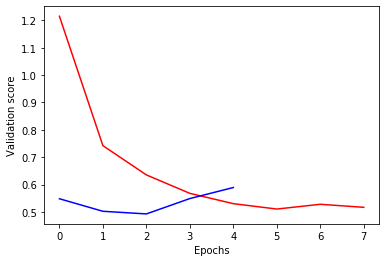

In [35]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax', input_shape=input_shape))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

The blue model is the one you made, the red is the original model. Your model had a lower loss value, so it is the better model. 

----

### Adding layers to a network

You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called `model_1` as a starting point. It has 1 hidden layer, with `50` units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

#### Instructions

- Specify a model called `model_2` that is like `model_1`, but which has 3 hidden layers of 50 units instead of only 1 hidden layer.
    - Use `input_shape` to specify the input shape in the first hidden layer.
    - Use `'relu'` activation for the 3 hidden layers and `'softmax'` for the output layer, which should have 2 units.
- Compile `model_2` as you have done with previous models: Using `'adam'` as the `optimizer`, `'categorical_crossentropy'` for the loss, and `metrics=['accuracy']`.
- Hit 'Submit Answer' to fit both the models and visualize which one gives better results! For both models, you should look for the best `val_loss` and `val_acc`, which won't be the last epoch for that model.

In [36]:
# first create the first model

model_1 = Sequential()

# Add the first and second layers
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

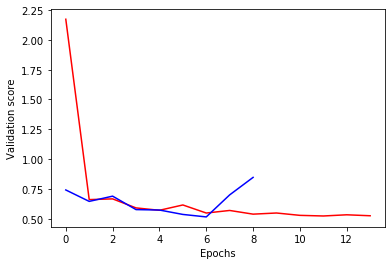

In [37]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape = input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

The blue model is the one you made and the red is the original model. The model with the lower loss value is the better model.

----

### Experimenting with model structures

You've just run an experiment where you compared two networks that were identical except that the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?

#### Possible Answers

- Try a new network with fewer layers than anything you have tried yet.
- **Use more units in each hidden layer. <<<**
- Use fewer units in each hidden layer.

Increasing the number of units in each hidden layer would be a good next step to try achieving even better performance.

----

### Building your own digit recognition model

You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have `X` and `y` loaded and ready to model with. `Sequential` and `Dense` from keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a [blog post](https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws) by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

Ready to take your deep learning to the next level? Check out [Advanced Deep Learning with Keras in Python](https://www.datacamp.com/courses/advanced-deep-learning-with-keras-in-python) to see how the Keras functional API lets you build domain knowledge to solve new types of problems. Once you know how to use the functional API, take a look at "[Convolutional Neural Networks for Image Processing](https://www.datacamp.com/courses/convolutional-neural-networks-for-image-processing)" to learn image-specific applications of Keras.

#### Instructions

- Create a `Sequential` object to start your model. Call this `model`.
- Add the first `Dense` hidden layer of `50` units to your model with `'relu'` activation. For this data, the `input_shape` is `(784,)`.
- Add a second `Dense` hidden layer with `50` units and a `'relu'` activation function.
- Add the output layer. Your activation function should be `'softmax'`, and the number of nodes in this layer should be the same as the number of possible outputs in this case: `10`.
- Compile `model` as you have done with previous models: Using `'adam'` as the `optimizer`, `'categorical_crossentropy'` for the loss, and `metrics=['accuracy']`.
- Fit the model using `X` and `y` using a `validation_split` of `0.3`.

In [38]:
# import the dataset
mnist = pd.read_csv('data/mnist.csv', header=None)

# prepare X and y
X = mnist.drop(0, axis=1)
y = pd.get_dummies(mnist[0]) # hot encoding get dummies

In [39]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', \
              metrics=['accuracy'])

# Fit the model
_ = model.fit(X, y, validation_split=0.3, epochs=10)

Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 3s 2ms/step - loss: 12.8149 - acc: 0.1950 - val_loss: 12.5294 - val_acc: 0.2180
Epoch 2/10
1400/1400 [==============================] - 0s 297us/step - loss: 11.7551 - acc: 0.2650 - val_loss: 12.4778 - val_acc: 0.2230
Epoch 3/10
1400/1400 [==============================] - 0s 293us/step - loss: 11.5168 - acc: 0.2829 - val_loss: 12.3749 - val_acc: 0.2280
Epoch 4/10
1400/1400 [==============================] - 0s 282us/step - loss: 11.4660 - acc: 0.2843 - val_loss: 12.1762 - val_acc: 0.2446
Epoch 5/10
1400/1400 [==============================] - 0s 287us/step - loss: 11.3619 - acc: 0.2943 - val_loss: 12.1575 - val_acc: 0.2446
Epoch 6/10
1400/1400 [==============================] - 0s 307us/step - loss: 11.3467 - acc: 0.2950 - val_loss: 12.1493 - val_acc: 0.2446
Epoch 7/10
1400/1400 [==============================] - 0s 321us/step - loss: 11.3254 - acc: 0.2964 - val_loss: 12.1779 - val_a

**DataCamp's note** >>> You've done something pretty amazing. You should see better than 90% accuracy recognizing handwritten digits, even while using a small training set of only 1750 images!

Note that, our values is bit lower. IPython shell on the DataCamp had 2500 observation, although our sample had 2001 samples.